#All imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipyleaflet import Map, basemaps, Marker, CircleMarker


#Loading data

In [ ]:
airbnb_raw=pd.read_csv('/content/airbnb.csv')

**Data Description:**

**variable name |	Description**
--- | ---
id |	listing ID
name	| name of the listing
host_id	| host ID
host_name	| name of the host
neighbourhood_group | 	location
neighbourhood	| area
latitude	| latitude coordinates
longitude	| longitude coordinates
room_type | listing space type
price	| price in dollars
minimum_nights| 	amount of minimum nights to book
number_of_reviews	| number of reviews
last_review	| date of latest review
reviews_per_month | 	number of reviews per month
calculated_host_listings_count| 	amount of listing per host
availability_365	| number of days when listing is available for booking



#Data Exploration & cleaning

Getting details about data:
*    16 variables 48,895  observations
*    last_review &  reviews_per_month have the most missing data

In [ ]:
airbnb_raw.info()
airbnb_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Checking for duplicates:
*    No duplicated data:




In [ ]:
print(airbnb_raw.duplicated('id').sum())
print(airbnb_raw.duplicated().sum())

0
0


Duplicated data at the host_id level is expected as one host can own several listings:

In [ ]:
print('Host ID duplicated observations: '+ str(airbnb_raw.duplicated('host_id').sum()))
print('Total listings per host duplicated observations: '+ str(airbnb_raw.duplicated(['host_id','calculated_host_listings_count']).sum()))

Host ID duplicated observations: 11438
Total listings per host duplicated observations: 11438


Deleting irrelevant variables:
*    name
*    host_name



In [ ]:
airbnb_raw.drop(['name', 'host_name'], axis=1)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#Graphical Analysis

##Missing data distribution:

*    last_review & reviews_per_month have the most missing data:

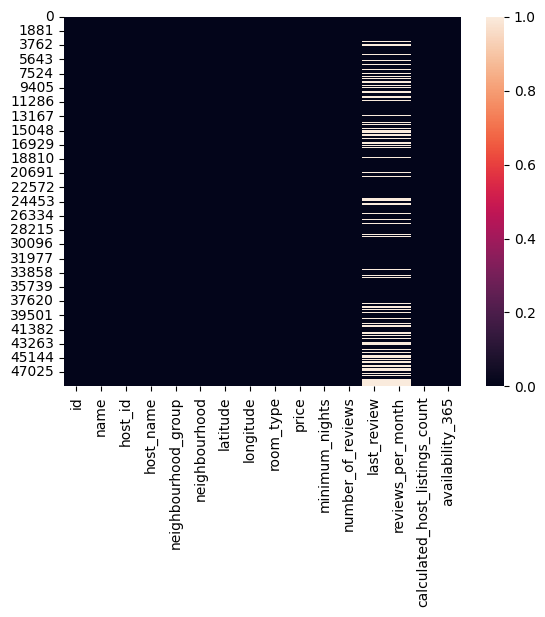

In [ ]:
sns.heatmap(airbnb_raw.isnull())
plt.show()

In [ ]:
airbnb_raw.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##Univariate analysis

###Summary stats

*   Average price per night 152 USD, further exploration needed as some prices are listed at 0 USD (check minimum). Almost unlikely to find a listing in NYC for 0 USD!
*   On average rentals require to book a minimum of 7 nights. Further exploration needed as there may be some outliers. There is a listing with a maximum value of 1200 nights
*   Hosts on average own 7 listins
*   On average, listins are available 112 days per year

In [ ]:
airbnb_raw.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


*   There are 5 neighbourhood groups and a total of 221 neighbourhoods
*   There are 3 different types of rooms rented



In [ ]:
airbnb_raw.describe(include='O')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


###**Graphs**

What do the histograms say?
*    Most airbnb rentals in NYC rent a private room or entire flat/home
*    Most places charge less than 500 USD per night
*    Most rentals have in total less than 50 reviews
*    Most rentals receive less than 5 reviews per month
*    The majority of rentals are located in Brooklyn and Manhattan
*    The numbers of days available in most listings varies and most of them are not available the whole year. The latter means there may be some seasonal trends, meaning that hosts probably decide to rent their properties during specific times of the year


<ipython-input-10-21df746ea033>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=45)
<ipython-input-10-21df746ea033>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[2,0].set_xticklabels(axis[2,0].get_xticklabels(), rotation=45)


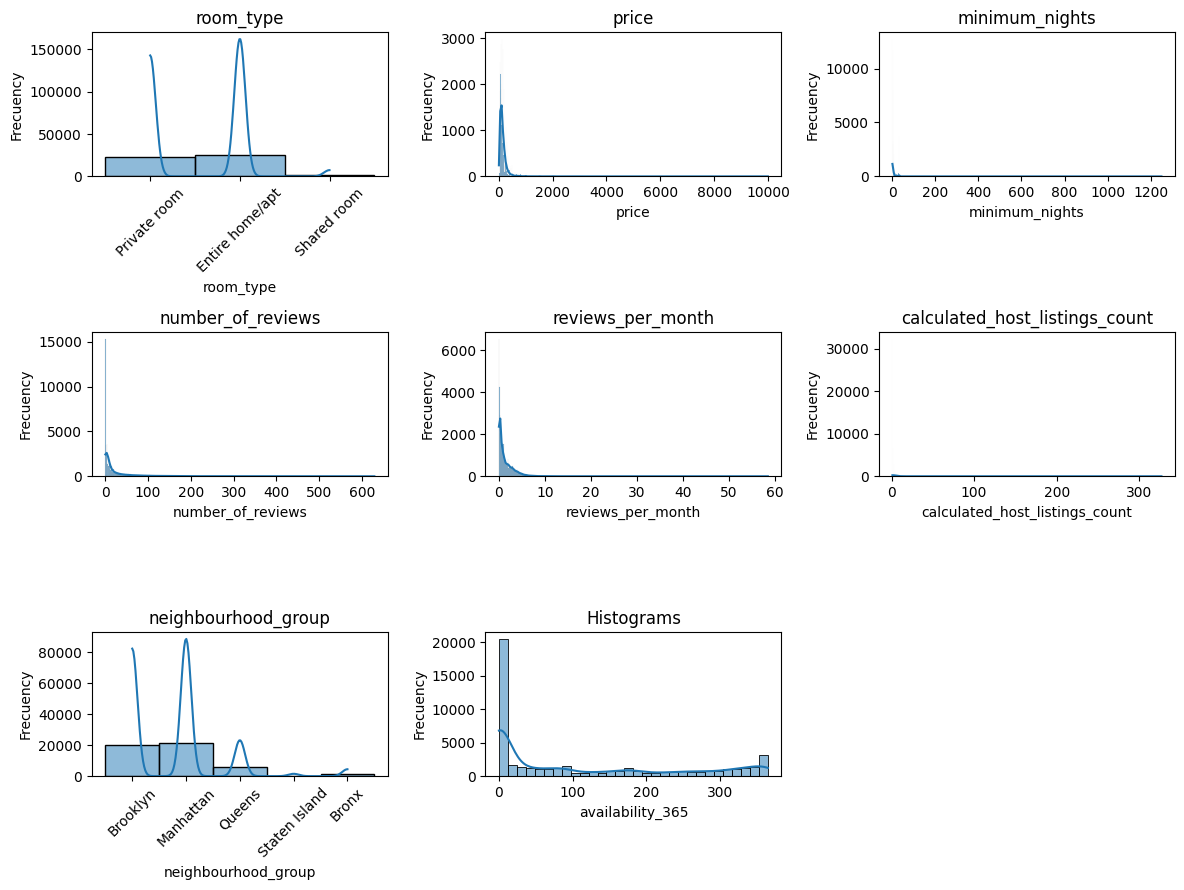

In [ ]:
varlist=['room_type', 'price','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count','neighbourhood_group','availability_365']
cols=3
rows=((len(varlist) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 3))

for col, ax in zip(varlist, axis.flatten()):
  sns.histplot(airbnb_raw[col], kde=True, ax=ax)
  ax.set_title(col)
  ax.set_ylabel('Frecuency')

axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=45)
axis[2,0].set_xticklabels(axis[2,0].get_xticklabels(), rotation=45)
#removing empty subplots
for i in range(len(varlist), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.title('Histograms')
plt.tight_layout()
plt.show()

**Further exploration for outliers:**



*   There are some outlier listings when it comes to price as some cost more than 2,000 USD per night. However, this result is not a surprise as NYC is one of the most expensive cities according to the World Economic Forum.
*   The minimum number of nights has outliers as well. Roughly 5 listings require a minimum of 600 nights or more to be booked. It is not clear if this issue is a data-input mistake or if there are some long-term listings on airbnb. Using the interquantile range, there are more than 6,000 listings classified as outliers, requiring a minimum of more than 11 nights to book the home/flat/room.
*   There are some listings (roughly 3,000 listings) with more than 100 reviews when the average is 23. A similar case occurs with the number of reviews per month
*   Thera are also roughtly 7,000 outlying rentals (using the interquantile method) from hosts who accumulate several listings. Although, to some extent, this result is expected as there is a big real state industry around airbnb in New York; according to The New York Times and The Guardian, the city is facing a major residential crisis.   

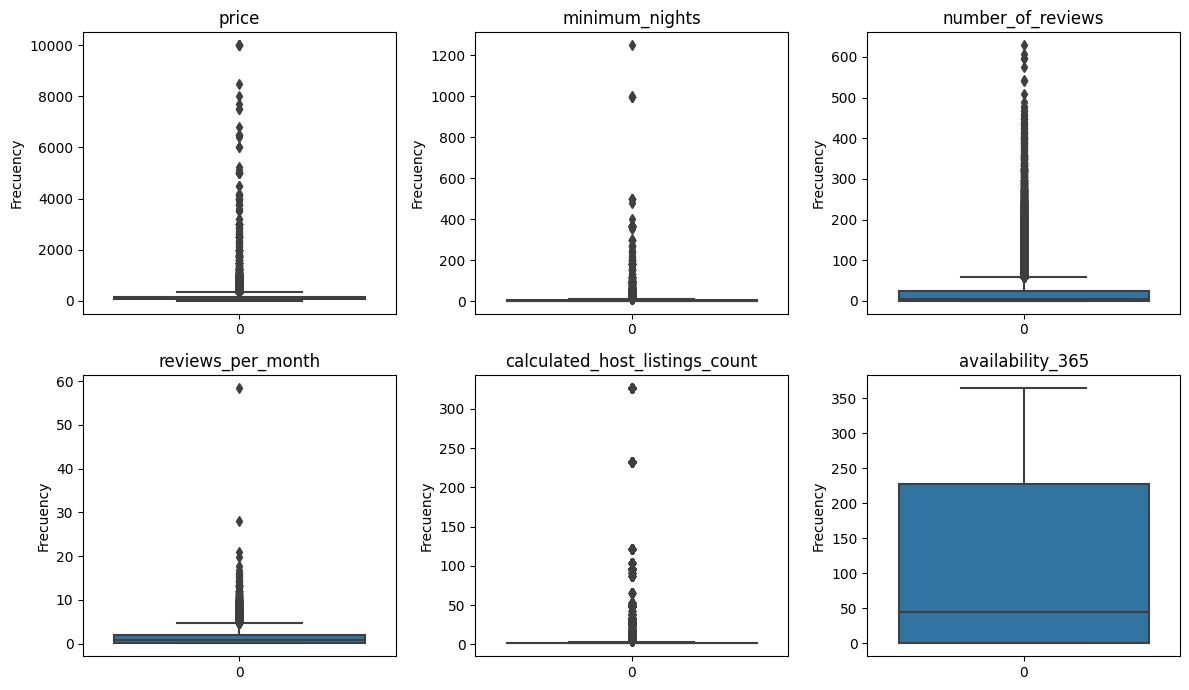

In [ ]:
varlist=['price','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count','availability_365']
cols=3
rows=((len(varlist) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 3.5))

for col, ax in zip(varlist, axis.flatten()):
  sns.boxplot(airbnb_raw[col], ax=ax)
  ax.set_title(col)
  ax.set_ylabel('Frecuency')


#removing empty subplots
for i in range(len(varlist), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

#plt.title('Histograms')
plt.tight_layout()
plt.show()

**Checking some descriptive stats for outliers:**

Minimum nights:

In [ ]:
airbnb_raw[['minimum_nights']][airbnb_raw['minimum_nights']>600].describe()

,minimum_nights
count,5.000000
mean,1049.400000
std,112.139645
min,999.000000
25%,999.000000
50%,999.000000
75%,1000.000000
max,1250.000000


In [ ]:
#Interquartile range method to detect outlies
Q1 = airbnb_raw['minimum_nights'].quantile(0.25)
Q3 = airbnb_raw['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)
airbnb_raw[['minimum_nights']][airbnb_raw['minimum_nights']>upper_bound].describe()


11.0


,minimum_nights
count,6607.000000
mean,34.715907
std,46.959229
min,12.000000
25%,28.000000
50%,30.000000
75%,30.000000
max,1250.000000


Number of reviews:

In [ ]:
airbnb_raw[['number_of_reviews']][airbnb_raw['number_of_reviews']>100].describe()

,number_of_reviews
count,2995.000000
mean,164.369950
std,65.409353
min,101.000000
25%,119.000000
50%,144.000000
75%,190.000000
max,629.000000


Count of listings per host:

In [ ]:
#Interquartile range method to detect outlies
Q1 = airbnb_raw['calculated_host_listings_count'].quantile(0.25)
Q3 = airbnb_raw['calculated_host_listings_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

airbnb_raw[['calculated_host_listings_count']][airbnb_raw['calculated_host_listings_count']>upper_bound].describe()

,calculated_host_listings_count
count,7081.000000
mean,41.678718
std,78.115838
min,4.000000
25%,5.000000
50%,8.000000
75%,33.000000
max,327.000000


##Multivariate analysis

###Multicollinearity assessment

*    There are no major correlations among most variables
*    There is some correlation between reviews per month and number of reviews, which is expected since they are collinear by definition

<ipython-input-12-c76b1ee65375>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = airbnb_raw.corr()


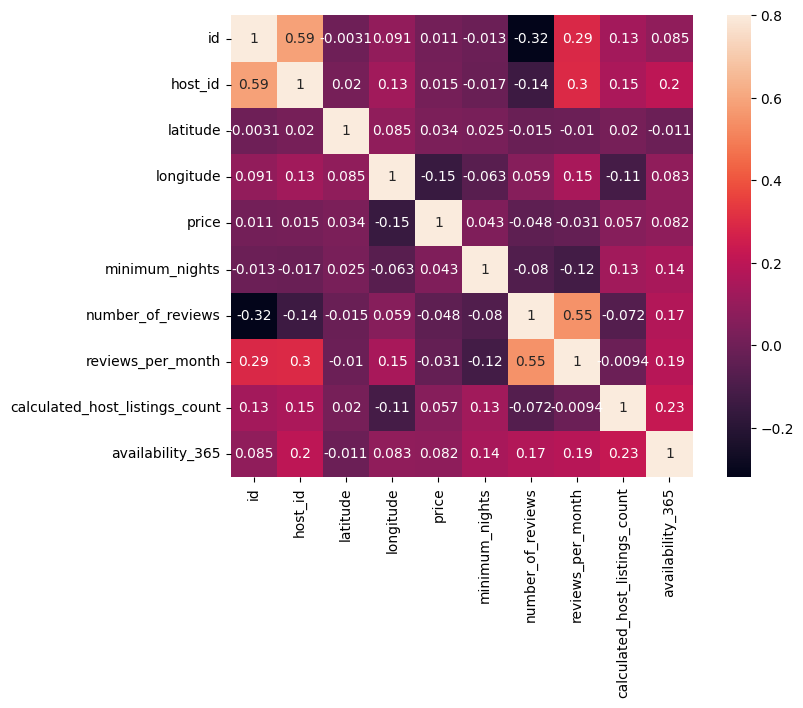

In [ ]:
corr = airbnb_raw.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, vmax=.8, square=True, annot=True)
plt.show()

In [ ]:
airbnb_raw.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Descriptive relationship of variables:**
*   According to the pairplot, it seems that the variable minimum_nights drives several of the outliers when analysing its relationship with the rest of the dataframe variables
*   The same case occurs when looking at the relationship between reviews per month and the rest of the variables. The scatter plots show outlier dots for reviews per month = 60
*   When looking at the relationship between the number of listings per host and the rest of the variables, most of the relationships seem to occur for less than 200 listings per host.
*    Several of the relationships seem, descriptively, to follow a reciprocal function. For example, when looking at the relationship of price and number of reviews, the tails of the graph. Meaning that the higher the number of reviews the lower is the price of the listing. One possible hypothesis could be that cheaper listings may be lower quality and people may be more keen to leave reviews in lower-quality-cheap listings.


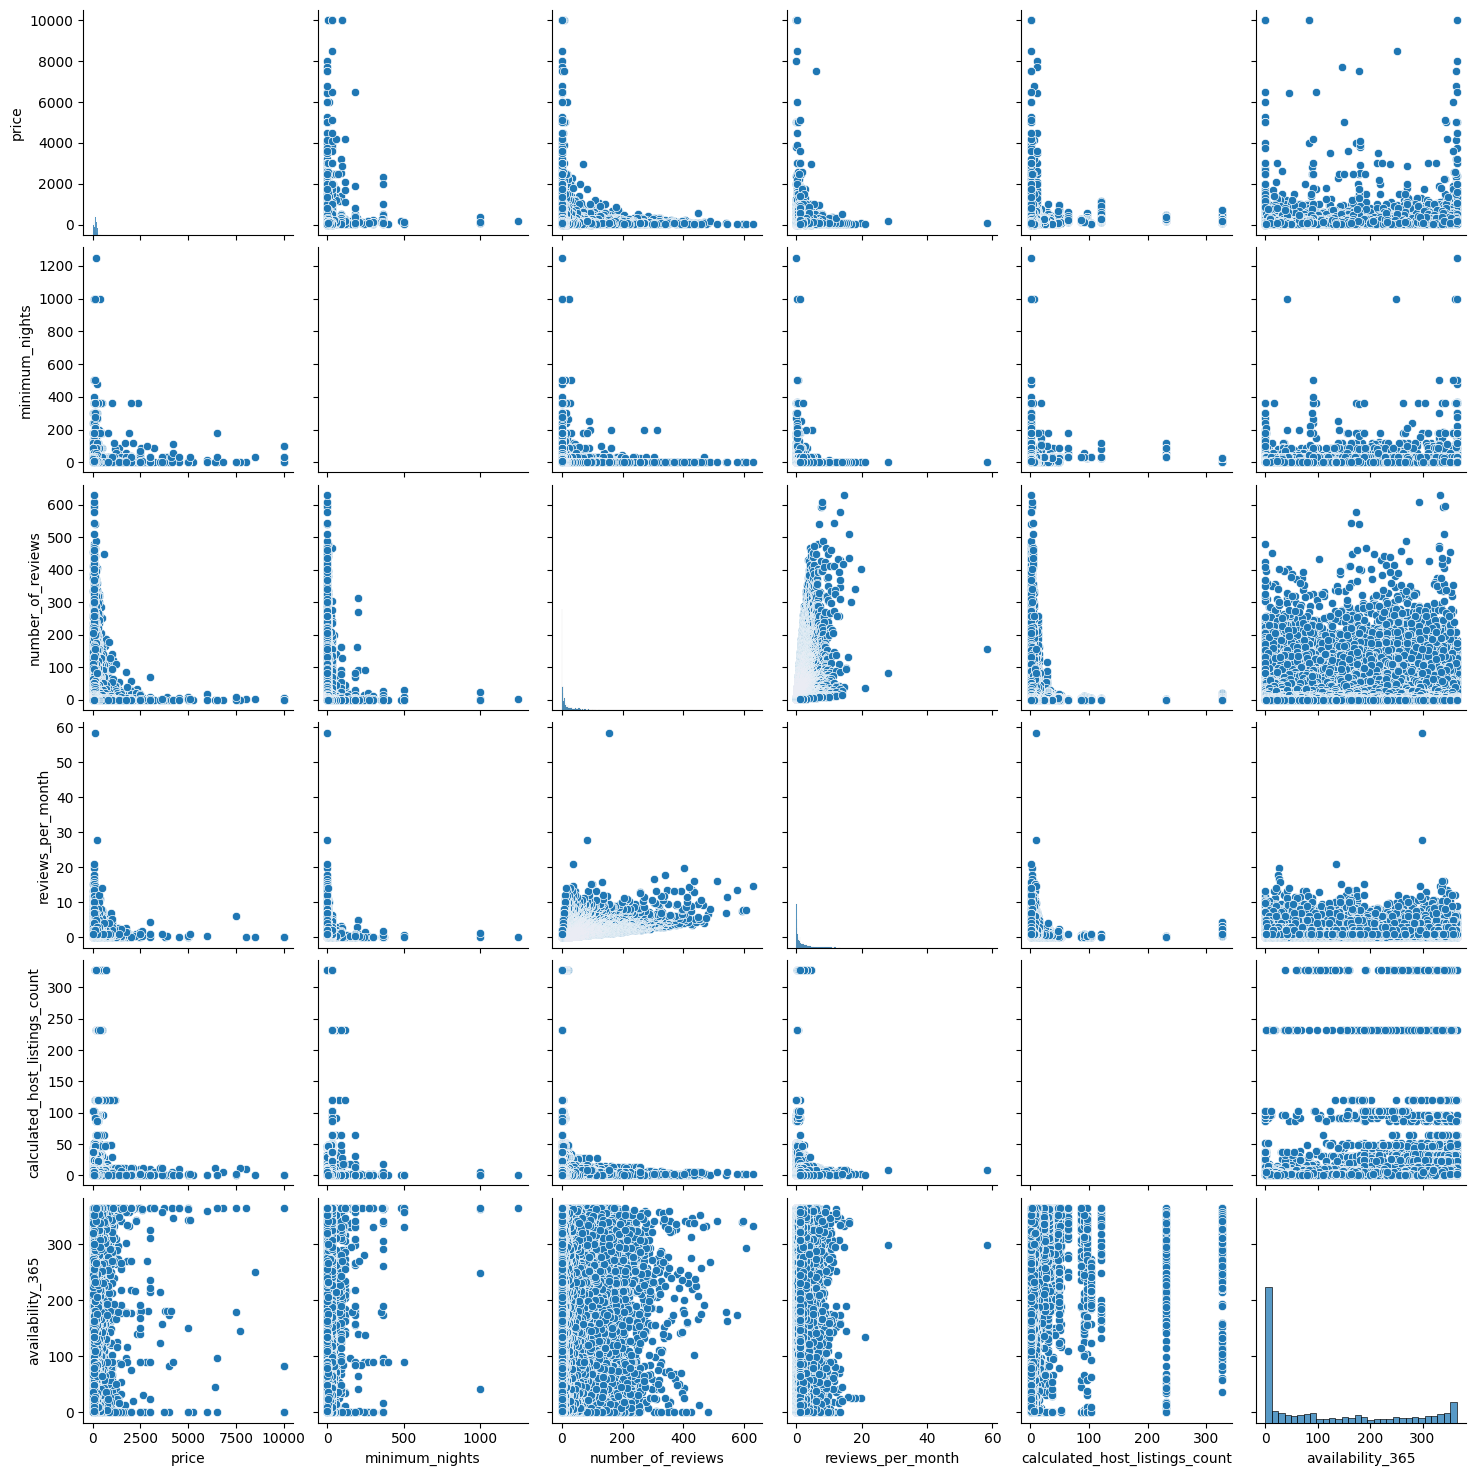

In [ ]:
list2=['neighbourhood_group','room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
sns.pairplot(airbnb_raw[list2], corner=False)
plt.show()

###Cross tabulation analysis of variables

**Neighbourhood vs Price:**
Airbnb rentals are on average more expensive in the areas of Brooklyn and Manhattan

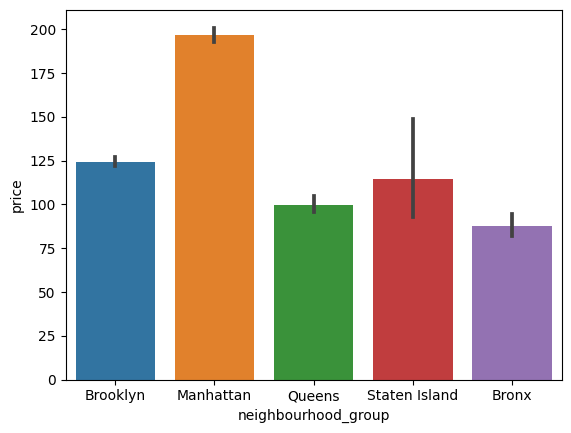

In [ ]:
sns.barplot(data=airbnb_raw, x='neighbourhood_group', y='price')
plt.show()

In [ ]:
# Map centred on NYC (Latitude, longitude)
map = Map(center = (40.7128, -74.0060), zoom = 10, min_zoom = 1, max_zoom = 20,
    basemap=basemaps.Stamen.Terrain)

# Define a dictionary to map population names to marker colours
population_colours = {
    "Brooklyn": "blue",
    "Manhattan": "orange",
    "Queens": "green",
    "Staten Island": "red",
    "Bronx": "purple"
}

# Iterating through the DataFrame and add markers to the map
for _, row in airbnb_raw.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    population = row['neighbourhood_group']
    color = population_colours.get(population, "gray")  # Default to gray if population not found

    marker = CircleMarker(location=(latitude, longitude), radius=5, color=color, fill=True, fill_color=color)
    map.add_layer(marker)

# Display the map
map

<Axes: >

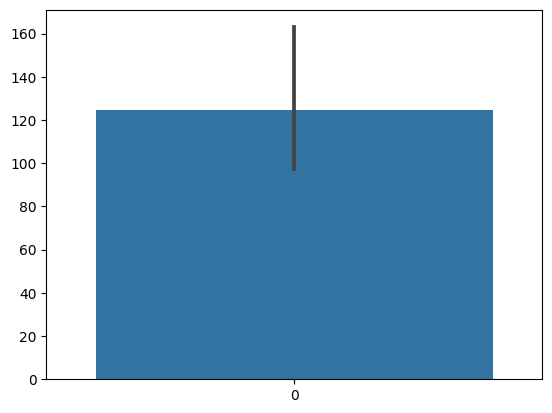

In [ ]:
sns.barplot(airbnb_raw.groupby('neighbourhood_group')['price'].mean())